In [51]:
import pandas as pd

In [52]:
#ways to read a file using pandas
df=pd.read_csv('/path')
df=pd.read_excel('/path')
df=pd.read_json('/path')

FileNotFoundError: [Errno 2] No such file or directory: '/path'

In [ ]:
#save a csv
df.to_csv('/path',index=False)
df.to_excel('/path',index=False)
df.to_json('/path')

##### Filtering

In [53]:
data={'Product':['A','B','C','A'],'Sales':[1000,3000,500,1500],'Region':['East','West','East','South']}
df=pd.DataFrame(data)
df

,Product,Sales,Region
0,A,1000,East
1,B,3000,West
2,C,500,East
3,A,1500,South


In [54]:
#selecting on the basis of condition
df[df['Region']=='East']

,Product,Sales,Region
0,A,1000,East
2,C,500,East


In [55]:
#selecting columns
print(df['Product'])
print(df[['Product','Region']])

0    A
1    B
2    C
3    A
Name: Product, dtype: object
  Product Region
0       A   East
1       B   West
2       C   East
3       A  South


In [56]:
#loc (label based selecting method)
print(df.loc[df.Product=='A'])
print('\n')
print(df.loc[0:2,'Region'])
print('\n')
print(df.loc[(df.Product=='A'),['Region','Sales']])

  Product  Sales Region
0       A   1000   East
3       A   1500  South


0    East
1    West
2    East
Name: Region, dtype: object


  Region  Sales
0   East   1000
3  South   1500


In [57]:
#iloc (index based selecting method)
#last element of range mentioned is not selected like loc
print(df.iloc[0:2,0:2])
print(df.iloc[[1,3]])

  Product  Sales
0       A   1000
1       B   3000
  Product  Sales Region
1       B   3000   West
3       A   1500  South


In [58]:
#isin function
#checks whether some value in column is present in the list
print(df[df['Region'].isin(['East','West'])])

  Product  Sales Region
0       A   1000   East
1       B   3000   West
2       C    500   East


##### Sorting

In [59]:
#sorting value
print(df.sort_values(by=['Sales'],ascending=False)) #false means descending order
print(df.sort_values(by=['Region'],ascending=True))
print(df.sort_values(by=['Region','Sales'],ascending=False))  #first by variable group/sorts the variables,second variable sorts within the group that is already sorted

  Product  Sales Region
1       B   3000   West
3       A   1500  South
0       A   1000   East
2       C    500   East
  Product  Sales Region
0       A   1000   East
2       C    500   East
3       A   1500  South
1       B   3000   West
  Product  Sales Region
1       B   3000   West
3       A   1500  South
0       A   1000   East
2       C    500   East


##### Grouping Data

In [63]:
df.groupby('Product').sum()

,Sales,Region
Product,,
A,2500,EastSouth
B,3000,West
C,500,East


In [64]:
data = {'Age': [25, 40, 35, 28, 27],
        'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
        'Income': [50000, 75000, 58000, 60000, 52000]}
df = pd.DataFrame(data)
df.groupby('Gender').agg({'Income':'mean','Age':'mean'})

,Income,Age
Gender,,
Female,53333.333333,29.0
Male,67500.000000,34.0


In [73]:
#You want to find the average income of individuals over 30, grouped by gender, and then sort the result by average income in descending order.
result=df[df['Age']>30].groupby('Gender').agg({'Income':'mean'}).sort_values('Income',ascending=False) #by=['Income'] or 'Income in sort_values
result

,Income
Gender,
Male,75000.0
Female,58000.0


##### Missing values

In [87]:
data = {'A': [1, 2, None], 'B': [4, None, 6]}
df = pd.DataFrame(data)
df.isna()

,A,B
0,False,False
1,False,True
2,True,False


In [78]:
#drop rows having values null
df.dropna(axis=0)

,A,B
0,1.0,4.0


In [79]:
#drop columns having values null
df.dropna(axis=1)

""
0
1
2


In [80]:
#fill missing values with 1
df.fillna(1)

,A,B
0,1.0,4.0
1,2.0,1.0
2,1.0,6.0


In [81]:
#fill missing values with mean of column
df.fillna(df.mean())

,A,B
0,1.0,4.0
1,2.0,5.0
2,1.5,6.0


In [99]:
#replacing null values
import numpy as np
df.replace(np.nan, -1)

,A,B
0,1.0,4.0
1,2.0,-1.0
2,-1.0,6.0


In [101]:
#interpolate
#based on near neighbouring points it assigns values to missing values
df.interpolate()

,A,B
0,1.0,4.0
1,2.0,5.0
2,2.0,6.0


##### Merging and Concatenation

In [105]:
#concatenation
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7']})

pd.concat([df1,df2])

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7


In [107]:
#merging
df1 = pd.DataFrame({'Key': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})

df2 = pd.DataFrame({'Key': ['K0', 'K1', 'K2', 'K3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})
pd.merge(df1,df2,on='Key')

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [113]:
#join
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']},
                    index=['K0', 'K1', 'K2'])

df2 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                    index=['K0', 'K2', 'K3'])
df1.join(df2)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [114]:
df2.join(df1)

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


##### Pivot table

In [115]:
data = {'A': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'],
        'B': ['one', 'one', 'two', 'two', 'one', 'one'],
        'C': [1, 2, 3, 4, 5, 6]}

df = pd.DataFrame(data)

In [116]:
pivot_table=df.pivot_table(values='C',index='A',columns='B',aggfunc='sum')
pivot_table

B,one,two
A,,
bar,11,4
foo,3,3


In [119]:
pivot_table = df.pivot_table(values='C', index='A', columns='B', aggfunc=[sum, np.mean])
pivot_table

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_12356\1035392270.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = df.pivot_table(values='C', index='A', columns='B', aggfunc=[sum, np.mean])
C:\Users\Vishnu\AppData\Local\Temp\ipykernel_12356\1035392270.py:1: FutureWarning: The provided callable <function mean at 0x000001FBBF3AE980> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = df.pivot_table(values='C', index='A', columns='B', aggfunc=[sum, np.mean])


sum     mean     
B   one two  one  two
A                    
bar  11   4  5.5  4.0
foo   3   3  1.5  3.0

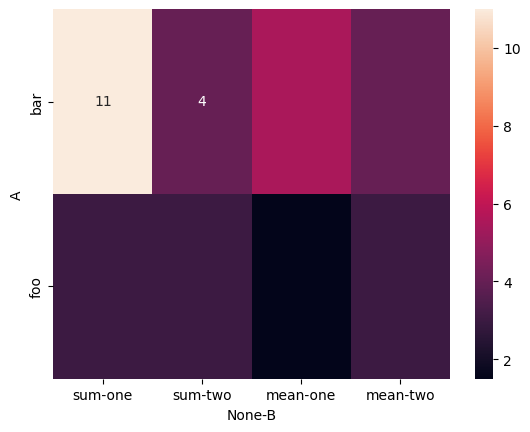

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pivot_table, annot=True)
plt.show()

##### Time series analysis

In [140]:
data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'Sales': [200, 300, 400]}
df = pd.DataFrame(data)

In [141]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Sales
Date,
2023-01-01,200
2023-01-02,300
2023-01-03,400


In [132]:
#time based indexing using loc
df.loc['2023-01-01']

Sales    200
Name: 2023-01-01 00:00:00, dtype: int64

In [135]:
#resampling is converting daily data into weekly data
df.resample('W').sum()

,Sales
Date,
2023-01-01,200
2023-01-08,700


In [146]:
#rolling window is like moving window average :::: moving average of 3 three days
df['3_day_MA'] = df['Sales'].rolling(window=3).mean()
df

,Sales,3_day_MA
Date,,
2023-01-01,200,NaN
2023-01-02,300,NaN
2023-01-03,400,300.0


In [148]:
#shifting
df['Shifted_Sales'] = df['Sales'].shift(1)
df

,Sales,3_day_MA,Shifted_Sales
Date,,,
2023-01-01,200,NaN,NaN
2023-01-02,300,NaN,200.0
2023-01-03,400,300.0,300.0
